In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import model_fit
import ronchi_ruling as rr

# Analysis of the period of "R3L3" profile with the "mathematical microscope" method

## Load profile (unpack .nc array)

In [2]:
r3l3 = xr.open_dataset('data/R3L3_peaks.nc')

x, y, y_std = r3l3.x.values, r3l3.s.values, r3l3.ds.values
x_fine = np.linspace(x[0]-2, x[-1]+2, 512)

## Select an initial parameter guess

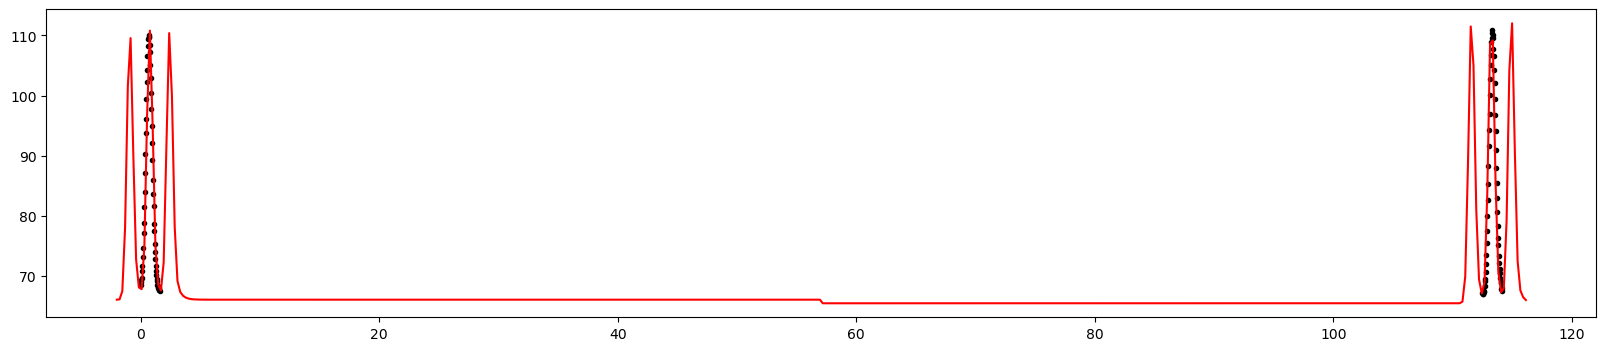

In [3]:
p0 = [66, 65.4, 130, 134, 0.460, 0.460, 57, 112.5, 0.2, 0.85, 0.36] ## Initial guess

plt.figure(figsize=(20, 4))
plt.plot(x, y, c='k', ls='', marker='.')
plt.plot(x_fine, rr.math_micro(x_fine, *p0), c='r')

## Fit the first and the last peak of the profile

In [4]:
fit_result = model_fit.fit(rr.math_micro, x, y, y_std, p0) ## Fit

/home/jovyan/work/model_fit/ronchi_ruling.py:8: RuntimeWarning: overflow encountered in exp
  a2 = np.exp(s**2/2/vtau**2 + x/vtau)*erfc(x/np.sqrt(2)/s + s/np.sqrt(2)/vtau)
/home/jovyan/work/model_fit/ronchi_ruling.py:13: RuntimeWarning: invalid value encountered in subtract
  return S0(x, xi - wi/2, s, a, vtau) - S0(x, xi + wi/2, s, a, vtau)


## Print fitted parameters

In [5]:
model_fit.print_params(fit_result['pars'])

Ig1 = 64.4+/-0.5
Ig2 = 63.5+/-0.5
I1 = 137.2+/-3.3
I2 = 132.0+/-2.4
w1 = 0.453+/-0.016
w2 = 0.519+/-0.013
xc = 56.9910+/-0.0018
l = 112.6544+/-0.0007
s = 0.217+/-0.004
a = 0.793+/-0.010
vtau = 0.59+/-0.12


## Plot the fit (upper panel) and standardized residuals (lower panel)

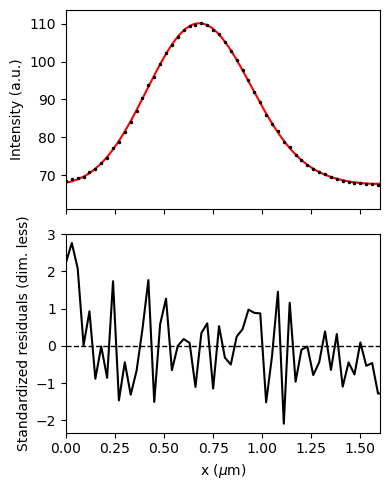

In [11]:
model_fit.plot_fit(fit_result, 
                   figsize=(4, 5), 
                   markersize=3, 
                   elinewidth=1,
                  ylabel='Intensity (a.u.)',
                  xlabel=r'x ($\mu$m)',
                   xlim=(0, 1.6)
                  )

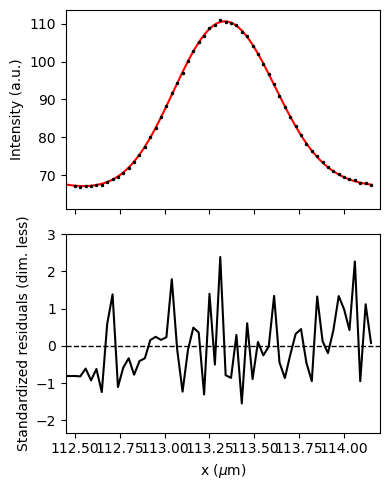

In [19]:
model_fit.plot_fit(fit_result, 
                   figsize=(4, 5), 
                   markersize=3, 
                   elinewidth=1,
                  ylabel='Intensity (a.u.)',
                  xlabel=r'x ($\mu$m)',
                   xlim=(112.45, 114.2)
                  )

***

## Fit using bootstrap for parameter estimation

In [22]:
p0 = [66, 65.4, 130, 134, 0.460, 0.460, 57, 112.5, 0.2, 0.85, 0.36] ## Initial guess

fit_result_bootstrap = model_fit.fit_with_bootstrap(rr.math_micro, x, y, y_std, p0, n_trials=1000) ## Fit

## Plot fitted parameters

In [23]:
model_fit.print_params(fit_result_bootstrap['pars'])

Ig1 = 64.5+/-0.7
Ig2 = 63.7+/-0.7
I1 = 137+/-4
I2 = 131.8+/-2.8
w1 = 0.452+/-0.017
w2 = 0.518+/-0.013
xc = 56.990+/-0.006
l = 112.6543+/-0.0007
s = 0.216+/-0.005
a = 0.78+/-0.04
vtau = 0.57+/-0.15


***